In [4]:
import re, csv, sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

In [5]:


class Cluster(object):
    
    def __init__(self,  name, dim):
        self.name = name
        self.dim = dim
        self.points = []
    
    def add_point(self, point):
        self.points.append(point)
        
    def get_points(self):
        return self.points
    
    def erase(self):
        self.points = []
    
    def get_X(self):
        return [p[0] for p in self.points]
    
    def get_Y(self):
        return [p[1] for p in self.points]

    def get_Z(self):
        if self.dim > 2:
            return [p[2] for p in self.points]
        return None
    
    def has(self, point):
        return point in self.points
            
    def __str__(self):
        return "%s: %d points" % (self.name, len(self.points))
    

In [6]:
class DBScanner:
    
    def __init__(self, config):
        self.eps = config['eps']
        self.min_pts = config['min_pts']
        self.dim = config['dim']
        self.clusters = set()
        self.cluster_count = 0
        self.visited = []
        self.color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    
    def dbscan(self, data):
        self.init_params()
        self.data = data

        ## Setting up the plot
        fig = plt.figure()

        axis_proj = 'rectilinear'
        if self.dim > 2:
            axis_proj = '%dd' % self.dim

        ax = fig.add_subplot(111, projection = axis_proj)
        
        #default noise cluster
        noise = Cluster('Noise', self.dim)
        self.clusters.add(noise)

        for point in data:
            if point not in self.visited:
                self.visited.append(point)
                neighbour_pts = self.region_query(point)
                if len(neighbour_pts) < self.min_pts:
                    noise.add_point(point)
                else:
                    name = 'cluster-%d' % self.cluster_count
                    new_cluster = Cluster(name, self.dim)

                    self.cluster_count += 1
                    self.expand_cluster(new_cluster, point, neighbour_pts)
                    
                    if self.dim == 2:
                        ax.scatter(new_cluster.get_X(), new_cluster.get_Y(), c = self.color[self.cluster_count % len(self.color)],
                        marker = 'o', label = name)
                    elif self.dim == 3:
                        ax.scatter(new_cluster.get_X(), new_cluster.get_Y(), new_cluster.get_Z(), marker = 'o', 
                        c = self.color[self.cluster_count % len(self.color)], label = name)

                    ax.hold(True)
        
        if len(noise.get_points()) != 0:
            if self.dim > 2:
                ax.scatter(noise.get_X(), noise.get_Y(), noise.get_Z(), marker = 'x', label = noise.name)
            else:
                ax.scatter(noise.get_X(), noise.get_Y(), marker = 'x', label = noise.name)
        
        print ("Number of clusters found: %d" % self.cluster_count)
        
        ax.hold(False)
        ax.legend(loc='lower left')
        ax.grid(True)
        plt.title(r'DBSCAN Clustering', fontsize=18)
        plt.show()
                    

    def expand_cluster(self, cluster, point, neighbour_pts):
        cluster.add_point(point)
        for p in neighbour_pts:
            if p not in self.visited:
                self.visited.append(p)
                np = self.region_query(p)
                if len(np) >= self.min_pts:
                    for n in np:
                        if n not in neighbour_pts:
                            neighbour_pts.append(n)
                    
                for other_cluster in self.clusters:
                    if not other_cluster.has(p):
                        if not cluster.has(p):
                            cluster.add_point(p)

                if self.cluster_count == 0:
                    if not cluster.has(p):
                        cluster.add_point(p)
                        
        self.clusters.add(cluster)
                    
    
    def get_distance(self, from_point, to_point):
        p1 = [from_point[k] for k in range(self.dim)]
        p2 = [to_point[k] for k in range(self.dim)]
        return distance.euclidean(p1, p2)

                     
    def region_query(self, point):
        result = []
        for d_point in self.data:
            if d_point != point:
                if self.get_distance(d_point, point) <= self.eps:
                    result.append(d_point)
        return result

    def init_params(self):
        self.clusters = set()
        self.cluster_count = 0
        self.visited = []


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


Number of clusters found: 2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


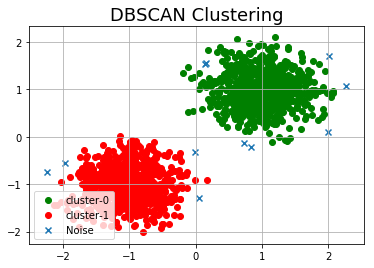

In [7]:

def get_data(config):
    data = []
    with open(DATA, 'rt') as file_obj:
        csv_reader = csv.reader(file_obj)
        for id_, row in enumerate(csv_reader):
            if len(row) < config['dim']:
                print ("ERROR: The data you have provided has fewer \
                    dimensions than expected (dim = %d < %d)"
                    % (config['dim'], len(row)))
                sys.exit()
            else:
                point = {'id':id_}
                for dim in range(0, config['dim']):
                    point[dim] = float(row[dim])
                data.append(point)
    return data



CONFIG = 'config'
DATA = '../data/blobs2.csv'

config = {'eps':0.2, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)



Number of clusters found: 1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


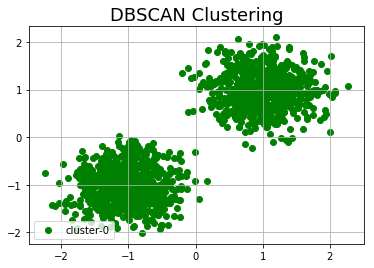

In [8]:
CONFIG = 'config'
DATA = '../data/blobs2.csv'

config = {'eps':1, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)

Number of clusters found: 1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


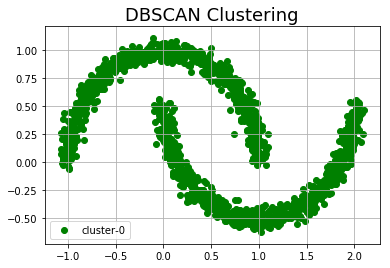

In [9]:
CONFIG = 'config'
DATA = '../data/moons2.csv'

config = {'eps':1, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


Number of clusters found: 2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


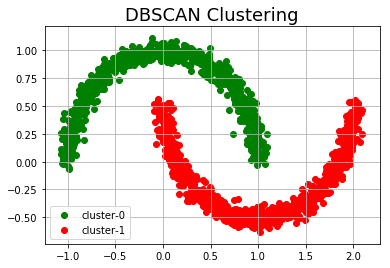

In [10]:
CONFIG = 'config'
DATA = '../data/moons2.csv'

config = {'eps':0.3, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)

Number of clusters found: 1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


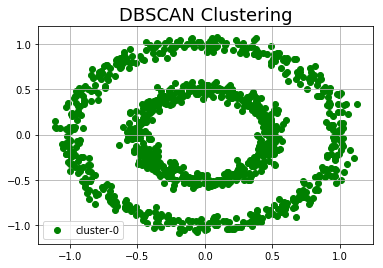

In [22]:
CONFIG = 'config'
DATA = '../data/circle2.csv'

config = {'eps':0.3, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


Number of clusters found: 2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


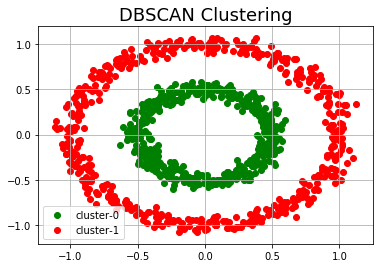

In [25]:
CONFIG = 'config'
DATA = '../data/circle2.csv'

config = {'eps':0.2, 'min_pts': 2, 'dim': 2}

dbc = DBScanner(config)
data = get_data(config)

dbc.dbscan(data)

In [24]:
list(dbc.clusters)[1].get_points()

[{'id': 2, 0: 2.048308857355257, 1: 0.49817159499878716},
 {'id': 9, 0: 1.9805557028468341, 1: 0.21499919338629103},
 {'id': 42, 0: 2.0323567230689075, 1: 0.535571915082387},
 {'id': 58, 0: 1.9549126060865472, 1: 0.5369850827727037},
 {'id': 80, 0: 1.9398855632578207, 1: 0.28855880406797674},
 {'id': 148, 0: 1.9299408041385933, 1: 0.32556966431974815},
 {'id': 156, 0: 2.021881920930224, 1: 0.3131675601892543},
 {'id': 172, 0: 1.9022998746168052, 1: 0.2873292761749349},
 {'id': 210, 0: 2.027370631333375, 1: 0.5110722405332995},
 {'id': 213, 0: 2.002180752223364, 1: 0.44466012156387874},
 {'id': 226, 0: 2.007510198639156, 1: 0.3914310902475492},
 {'id': 237, 0: 1.9939445014648205, 1: 0.4187858370105043},
 {'id': 250, 0: 1.8477912312958822, 1: 0.27943414547584283},
 {'id': 271, 0: 2.095061438177974, 1: 0.46305681369769025},
 {'id': 272, 0: 1.9027517792878297, 1: 0.2856159056919032},
 {'id': 281, 0: 1.9476307751432527, 1: 0.27625115579677373},
 {'id': 298, 0: 1.9583422714825551, 1: 0.39502